<a href="https://colab.research.google.com/github/CODSOFT-DS/Task-5/blob/main/Task_5_Credit_card_fraud_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from pylab import rcParams
import warnings

In [4]:
df = pd.read_csv('creditcard.csv')

In [ ]:

df = df.sample(n=len(df), random_state=1) # Uses the length of the DataFrame, ensuring you don't oversample.

In [ ]:
df.head(10)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
168992,119477.0,-0.746024,0.122586,1.446370,-1.231084,0.454367,-0.319895,0.263201,0.257762,0.114421,-0.804524,0.003391,-0.160897,-1.395810,0.270032,-0.708338,0.977821,-1.109228,0.421986,-0.184162,-0.106188,-0.159939,-0.701706,0.024572,-0.549109,-0.478292,0.157124,0.033685,0.123323,21.98,0
199684,133083.0,1.944619,-0.512730,-0.564270,0.068730,-0.593276,-0.426475,-0.563937,0.089997,0.811225,0.265523,0.527348,0.143708,-1.149345,0.548201,0.570114,1.035260,-1.015443,0.451122,0.205585,-0.184134,-0.166434,-0.618222,0.373876,-0.458494,-0.715058,0.244721,-0.062918,-0.054441,36.49,0
274826,166231.0,-0.446742,0.119524,0.427752,-0.862470,-0.150824,-0.333836,-0.532673,0.425427,0.816839,-1.177950,-1.599529,0.067699,0.296311,0.458563,2.510464,-1.079602,0.516328,0.670656,3.928589,0.308553,-0.122575,-0.379486,-0.067095,-0.982354,-0.645589,-0.072341,0.125922,0.033750,4.97,0
211903,138622.0,-0.225123,1.149271,-0.480962,-0.327031,0.123853,-1.334834,0.656554,0.173576,-0.039607,-0.475868,-1.237162,-0.397507,-0.902489,0.932238,0.520916,-0.280069,-0.246513,0.312351,0.036602,-0.197359,0.400427,1.254510,-0.067556,0.059308,-0.800327,-0.217006,0.378974,0.258453,2.57,0
62193,50172.0,-1.002868,0.907447,2.716439,0.917762,-0.654165,0.780999,-0.386971,0.589756,-0.025501,0.355465,1.252597,0.027570,-0.832010,0.105897,1.627894,0.230545,-0.294296,1.030696,0.227495,0.298907,0.297793,1.051349,-0.279863,0.002093,0.134084,-0.019025,0.501311,0.212695,13.99,0
271419,164566.0,-0.476787,1.075065,-0.066977,-0.645850,0.028672,-0.907984,0.528917,0.351697,-0.328073,-0.342684,0.622637,0.723022,-0.574215,0.702732,-1.080474,0.213842,-0.433808,-0.184722,0.173696,-0.194585,-0.151285,-0.495903,0.158700,0.053674,-0.532516,0.107370,-0.016465,0.018594,9.12,0
34911,37880.0,1.562782,-1.229601,-1.158630,-2.496174,0.974909,3.237633,-1.478926,0.745097,-1.985665,1.496878,-0.242664,-1.026740,0.500079,-0.174380,0.750585,-0.076410,0.006502,0.398706,0.125493,-0.188505,-0.263261,-0.527888,-0.006884,0.982099,0.546208,-0.191959,0.031388,0.015444,20.00,0
78542,57579.0,-1.272185,-0.515689,1.286000,-2.604587,-0.958627,0.288740,-0.561232,0.567165,-2.406655,0.461636,-1.413951,-0.912776,1.472492,-0.526405,0.484605,0.099962,0.189666,0.263981,-0.985663,0.086563,0.040883,0.213960,-0.093070,-0.946746,0.570098,-0.083842,0.174548,0.016936,118.00,0
103455,68661.0,-2.648624,2.632641,-0.852625,0.912895,-1.476497,-0.643671,-1.209933,2.136096,-0.767506,-0.498354,-1.229484,0.008645,-1.130044,2.029766,1.273263,-0.005799,0.984641,-0.020812,0.007191,-0.469974,0.349701,0.404209,0.174723,0.040662,-0.182059,-0.305053,-0.493996,-0.063755,1.49,0
106533,70002.0,-1.959720,1.300850,0.526352,-0.973719,0.057169,-0.509813,0.187425,-4.513088,-0.018618,-0.148237,-0.425335,-0.095372,-0.735821,0.331986,0.207292,0.225963,-0.207971,-0.829134,-0.243383,-1.372319,3.311668,-2.189073,0.452558,0.362327,-0.385883,0.540367,0.292696,-0.201935,109.00,0


In [5]:
df.shape

(15936, 31)

In [6]:
df.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

In [7]:
df.isnull()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15931,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
15932,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
15933,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
15934,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [8]:
df.isnull().sum()

,0
Time,0
V1,0
V2,0
V3,0
V4,0
V5,0
V6,0
V7,0
V8,0
V9,0


In [9]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,15936.000000,15936.000000,15936.000000,15936.000000,15936.000000,15936.000000,15936.000000,15936.000000,15936.000000,15936.000000,...,15936.000000,15936.000000,15935.000000,15935.000000,15935.000000,15935.000000,15935.000000,15935.000000,15935.000000,15935.000000
mean,12121.217871,-0.254293,0.277171,0.803852,0.301343,-0.130469,0.112551,-0.150434,0.000687,0.860838,...,-0.061754,-0.162257,-0.036524,0.011509,0.117477,0.037900,0.015402,0.006161,66.390222,0.004581
std,8982.283843,1.843083,1.491497,1.704252,1.491713,1.382485,1.329406,1.321898,1.303509,1.253988,...,0.855525,0.624614,0.543296,0.587200,0.436867,0.546881,0.401168,0.253739,189.355098,0.067531
min,0.000000,-28.344757,-40.978852,-27.368650,-5.172595,-32.092129,-23.496714,-26.548144,-23.632502,-7.175097,...,-11.468435,-8.593642,-26.751119,-2.512377,-7.495741,-1.338556,-8.567638,-3.575312,0.000000,0.000000
25%,3633.500000,-0.970824,-0.286548,0.371671,-0.621215,-0.712525,-0.639011,-0.600811,-0.179179,0.067089,...,-0.268829,-0.559341,-0.173003,-0.336475,-0.140144,-0.355523,-0.073563,-0.013205,5.490000,0.000000
50%,10980.000000,-0.318478,0.247437,0.941822,0.231366,-0.186241,-0.160812,-0.084696,0.017471,0.851878,...,-0.127164,-0.126343,-0.044512,0.060331,0.155636,-0.027574,0.001209,0.017630,15.950000,0.000000
75%,20621.500000,1.161949,0.884689,1.575960,1.180124,0.352221,0.501828,0.440006,0.266216,1.567643,...,0.027233,0.229727,0.072765,0.393416,0.393032,0.359173,0.100782,0.076575,53.890000,0.000000
max,27371.000000,1.960497,14.601998,4.101716,11.927512,34.099309,21.393069,34.303177,17.052566,10.392889,...,22.614889,4.534454,13.876221,3.695503,5.525093,3.517346,8.254376,4.860769,7712.430000,1.000000


In [10]:
# Try accessing the column using a different name,
# in case it's named differently.
# For example, 'Class' instead of 'class'
df['Class'].value_counts()

,count
Class,
0.0,15862
1.0,73


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15936 entries, 0 to 15935
Data columns (total 31 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Time    15936 non-null  int64  
 1   V1      15936 non-null  float64
 2   V2      15936 non-null  float64
 3   V3      15936 non-null  float64
 4   V4      15936 non-null  float64
 5   V5      15936 non-null  float64
 6   V6      15936 non-null  float64
 7   V7      15936 non-null  float64
 8   V8      15936 non-null  float64
 9   V9      15936 non-null  float64
 10  V10     15936 non-null  float64
 11  V11     15936 non-null  float64
 12  V12     15936 non-null  float64
 13  V13     15936 non-null  float64
 14  V14     15936 non-null  float64
 15  V15     15936 non-null  float64
 16  V16     15936 non-null  float64
 17  V17     15936 non-null  float64
 18  V18     15936 non-null  float64
 19  V19     15936 non-null  float64
 20  V20     15936 non-null  float64
 21  V21     15936 non-null  float64
 22

In [12]:
fraud=df[df['Class']==1]
genuine=df[df['Class']==0]
# Change 'amount' to 'Amount' to match the actual column name
fraud.Amount.describe()

,Amount
count,73.000000
mean,90.307123
std,271.634360
min,0.000000
25%,1.000000
50%,1.000000
75%,99.990000
max,1809.680000


In [13]:
genuine.Amount.describe()

,Amount
count,15862.000000
mean,66.280151
std,188.898885
min,0.000000
25%,5.522500
50%,15.950000
75%,53.890000
max,7712.430000


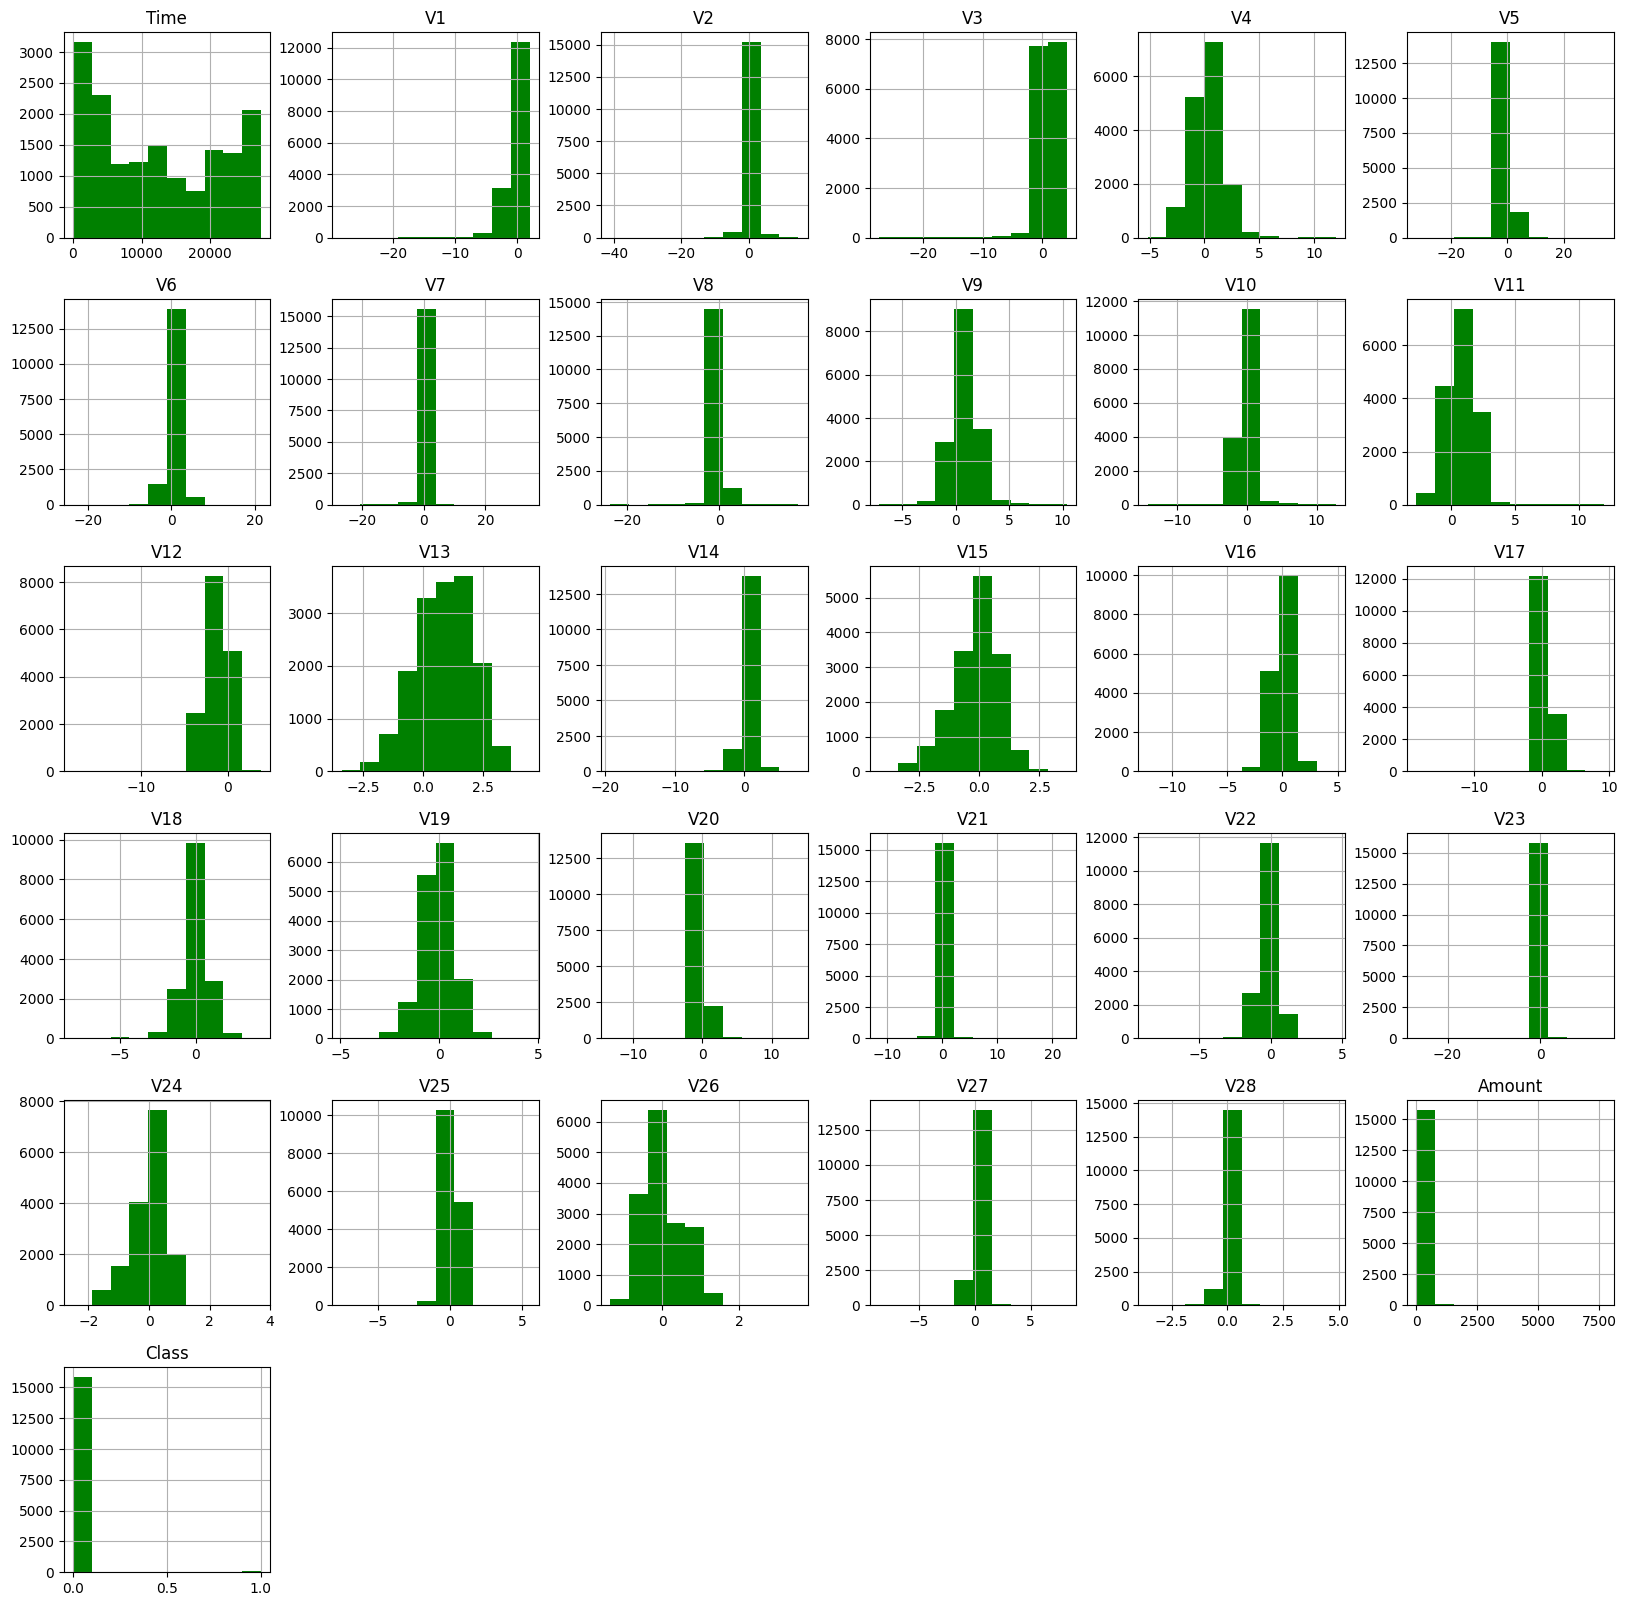

In [14]:
df.hist(figsize = (20, 20),color='green')
plt.show()

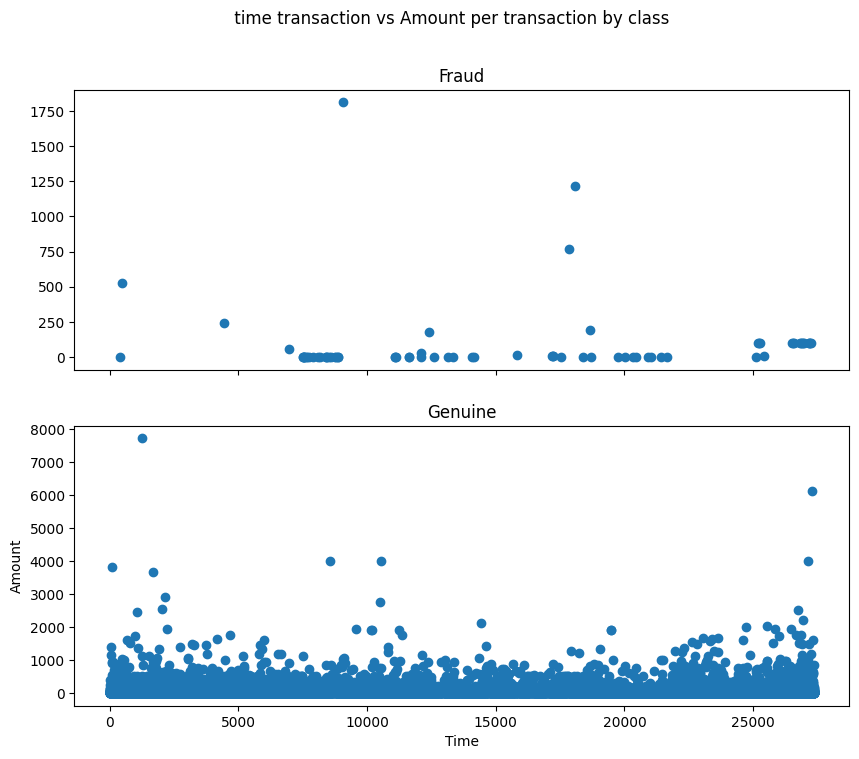

In [15]:
rcParams['figure.figsize']=(10,8)
f,(ax1,ax2) = plt.subplots(2,1,sharex=True,sharey=False)
f.suptitle(' time transaction vs Amount per transaction by class')
ax1.scatter(fraud.Time,fraud.Amount)
ax1.set_title('Fraud')
ax2.scatter(genuine.Time,genuine.Amount)
ax2.set_title('Genuine')
plt.xlabel('Time')
plt.ylabel('Amount')
plt.show()